In [7]:
import numpy as np
import matplotlib.pyplot as plt

from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

In [8]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비율 설정
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2

In [9]:
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test, epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr':0.01}, verbose=True)

trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.328878263426649
=== epoch:1, train acc:0.12333333333333334, test acc:0.1109 ===
train loss:2.331567042654956
train loss:2.291350789616826
train loss:2.3159615081703877
=== epoch:2, train acc:0.17333333333333334, test acc:0.1331 ===
train loss:2.278131991191804
train loss:2.2665158322363244
train loss:2.1986270985080236
=== epoch:3, train acc:0.20666666666666667, test acc:0.164 ===
train loss:2.272763651114837
train loss:2.186019169913655
train loss:2.1884924753712194
=== epoch:4, train acc:0.25, test acc:0.1849 ===
train loss:2.1845539274248313
train loss:2.1247009497033456
train loss:2.1115734034578106
=== epoch:5, train acc:0.2833333333333333, test acc:0.2112 ===
train loss:2.167267779939854
train loss:2.1403496428470468
train loss:2.084912669493593
=== epoch:6, train acc:0.29, test acc:0.2197 ===
train loss:2.0133088178145577
train loss:2.107688098025278
train loss:2.089530954957052
=== epoch:7, train acc:0.31333333333333335, test acc:0.2341 ===
train loss:2.02788857413

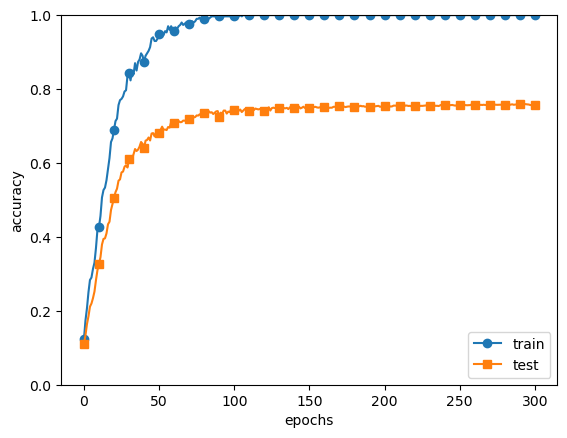

In [10]:
# 그래프 그리기
markers = {'train' : 'o', 'test' : 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()